In [72]:
#DBSCAN=>Density Based Spatial Clustering of Applications with Noise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df=data.groupby('Genre')

In [56]:
df['Spending Score (1-100)'].agg(np.sum)

Genre
Female    5771
Male      4269
Name: Spending Score (1-100), dtype: int64

In [55]:
df['Annual Income (k$)'].agg(np.sum)

Genre
Female    6636
Male      5476
Name: Annual Income (k$), dtype: int64

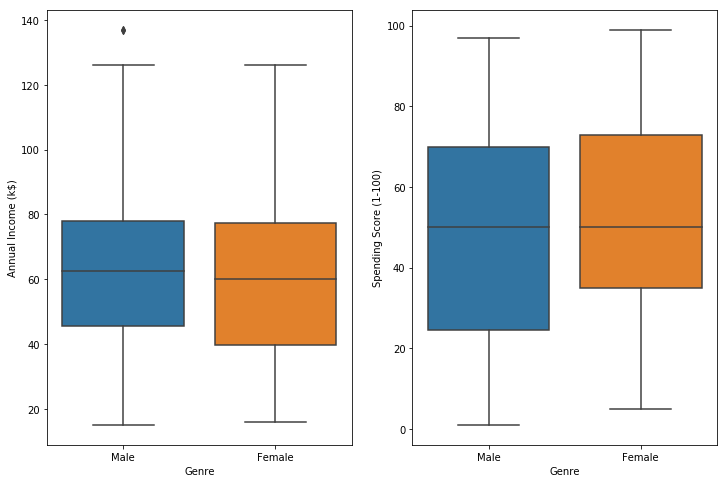

In [34]:
fig, axes=plt.subplots(1,2, figsize=(12,8))
sns.boxplot(x='Genre',y="Annual Income (k$)",data=data,orient='v',ax=axes[0])

sns.boxplot(x='Genre',y="Spending Score (1-100)",data=data,orient='v',ax=axes[1])

In [41]:
gg=data[['Genre','Spending Score (1-100)','Annual Income (k$)']]
gg.groupby(['Genre'],as_index=False).mean()

,Genre,Spending Score (1-100),Annual Income (k$)
0,Female,51.526786,59.250000
1,Male,48.511364,62.227273


In [47]:
female=data[data['Genre']=='Female']
print(female.shape)
female.head()

(112, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [52]:
percentage=(female.shape[0]/data.shape[0])*100
print('female percentage:',round(percentage),'%')

female percentage: 56 %


In [54]:
data['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

In [58]:
from sklearn.cluster import DBSCAN
import sklearn.utils

In [59]:
from sklearn.preprocessing import StandardScaler
clus_data=female[['Age','Annual Income (k$)','Spending Score (1-100)']]
clus_data=np.nan_to_num(clus_data)
clus_data=np.array(clus_data)
clus_data=StandardScaler().fit_transform(clus_data)
clus_data

C:\Users\NILESH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\NILESH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.43779008, -1.67017007, -1.89639214],
       [-1.19945882, -1.67017007,  1.06107213],
       [-0.56390879, -1.63155343, -0.48014165],
       [-1.27890257, -1.63155343,  1.0194177 ],
       [-0.24613377, -1.59293678, -1.89639214],
       [-1.19945882, -1.59293678,  1.76919738],
       [-0.64335254, -1.55432013,  0.8528    ],
       [-0.24613377, -1.55432013,  1.97746951],
       [ 1.58107256, -1.51570348, -1.52150231],
       [-1.12001506, -1.51570348,  1.06107213],
       [-0.24613377, -1.47708683, -0.68841378],
       [-0.24613377, -1.39985353,  1.93581508],
       [ 0.62774752, -1.32262023, -1.93804657],
       [ 1.26329755, -1.20677029, -1.56315673],
       [ 0.54830376, -1.20677029, -0.81337706],
       [ 0.151085  , -1.16815364, -0.85503148],
       [-1.19945882, -1.16815364,  1.47761639],
       [-1.35834632, -1.12953699,  0.89445442],
       [ 0.86607878, -1.01368704, -1.56315673],
       [-1.35834632, -1.01368704,  1.22768984],
       [ 0.3099725 , -0.97507039, -1.438

In [63]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=4).fit(clus_data)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

female['Clus_Db']=labels



C:\Users\NILESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [68]:
# A sample of clusters
print(female[['Age','Annual Income (k$)','Spending Score (1-100)',
                 'Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))


   Age  Annual Income (k$)  Spending Score (1-100)  Clus_Db
2   20                  16                       6       -1
3   23                  16                      77        0
4   31                  17                      40       -1
5   22                  17                      76        0
6   35                  18                       6       -1
number of labels:  {0, 1, 2, 3, -1}


In [70]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))


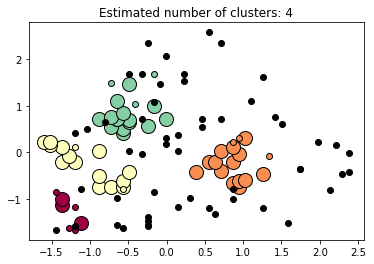

number of noise(s):  54


In [71]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = clus_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = clus_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise = list(labels).count(-1)
print('number of noise(s): ', n_noise)

